In [484]:
import numpy as np
import pandas as pd

In [486]:
df = pd.read_csv('spam.csv', encoding_errors= 'replace')

In [488]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
4717,ham,My uncles in Atlanta. Wish you guys a great se...,NaN,NaN,NaN
1241,ham,"I want to show you the world, princess :) how ...",NaN,NaN,NaN
4842,ham,I need details about that online job.,NaN,NaN,NaN
2591,ham,Still work going on:)it is very small house.,NaN,NaN,NaN
85,ham,"I call you later, don't have network. If urgnt...",NaN,NaN,NaN


In [490]:
df.shape

(5572, 5)

In [492]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [494]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [496]:
df.sample(5)

,v1,v2
188,ham,Have you got Xmas radio times. If not i will g...
3419,spam,"As a valued customer, I am pleased to advise y..."
3873,ham,No. Did you multimedia message them or e-mail?
3950,ham,Hi dude hw r u da realy mising u today
2591,ham,Still work going on:)it is very small house.


In [498]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
3567,ham,Sent me de webadres for geting salary slip
4348,ham,�� bot notes oredi... Cos i juz rem i got...
2192,ham,Congrats ! Treat pending.i am not on mail for ...
399,ham,Hmmm...k...but i want to change the field quic...
3826,spam,Congratulations U can claim 2 VIP row A Ticket...


In [500]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [502]:
df['target'] = encoder.fit_transform(df['target'])

In [504]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [506]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [508]:
df.duplicated().sum()

403

In [510]:
df = df.drop_duplicates(keep='first')

In [512]:
df.duplicated().sum()

0

In [514]:
df.shape

(5169, 2)

In [516]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

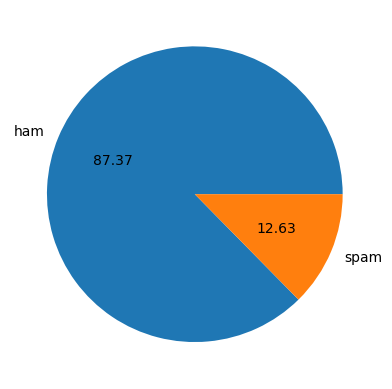

In [518]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [520]:
import nltk

In [522]:
!pip install nltk

In [523]:
nltk.download('punkt')
nltk.download('punkt_tab')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sagar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\sagar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [524]:
df['num_character'] = df['text'].apply(len)

In [525]:
df.head(5)

,target,text,num_character
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [526]:
#num of words
df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [527]:
df.head()

,target,text,num_character,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [528]:
df['num_sentences'] = df['text'].apply(lambda x : len(nltk.sent_tokenize(x)))

In [529]:
df.head()

,target,text,num_character,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [530]:
df[['num_character','num_words','num_sentences']].describe()

,num_character,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.923776,18.456761,1.966531
std,58.174846,13.325633,1.449833
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [531]:
#ham
df[df['target']==0][['num_character','num_words','num_sentences']].describe()

,num_character,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.456820,17.123782,1.820195
std,56.356802,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [532]:
#Spam
df[df['target']==1][['num_character','num_words','num_sentences']].describe()

,num_character,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.479326,27.675345,2.978560
std,30.014336,7.011513,1.493185
min,13.000000,2.000000,1.000000
25%,131.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,9.000000


In [533]:
import seaborn as sns

<Axes: xlabel='num_character', ylabel='Count'>

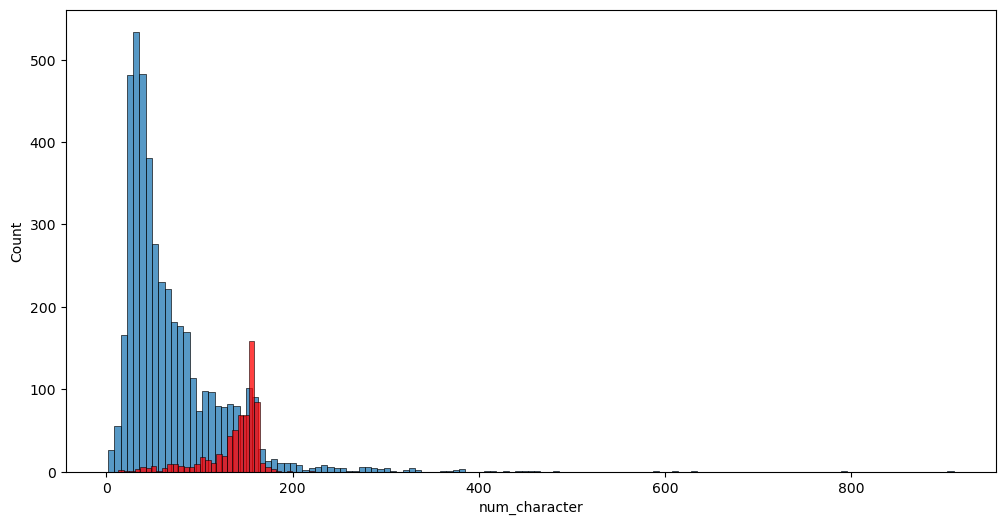

In [536]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_character'])
sns.histplot(df[df['target']==1]['num_character'],color = 'red')


<Axes: xlabel='num_words', ylabel='Count'>

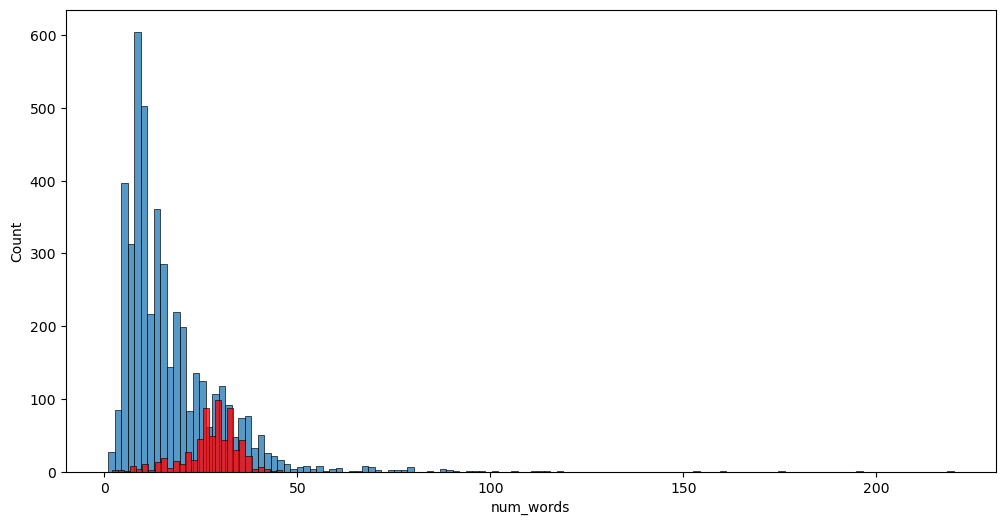

In [539]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color = 'red')

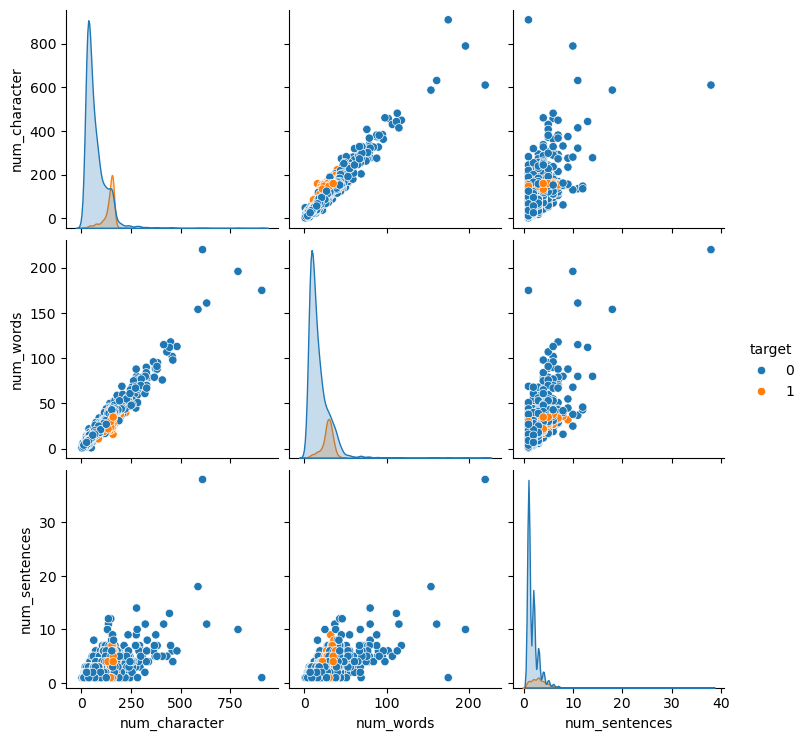

In [540]:
sns.pairplot(df,hue='target')

In [541]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
import string

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sagar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [542]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [543]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y=[]
    for i in text:
        if i.isalnum():
           y.append(i)
    text=y[:]
    y.clear()
    for i in text:
        if i not in  stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text=y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    return " " .join(y)

In [552]:
df['transformed_text']=df['text'].apply(transform_text) 

In [559]:
df.head()

,target,text,num_character,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [560]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [561]:
spam_wc = wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

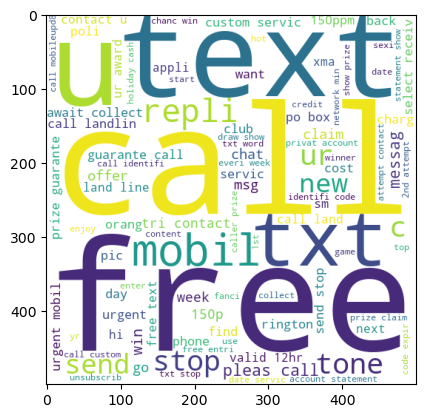

In [562]:
plt.figure(figure=(15,6))
plt.imshow(spam_wc)

In [563]:
ham_wc = wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))


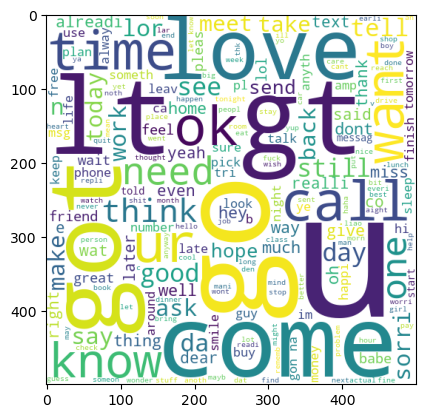

In [564]:
plt.figure(figure=(15,6))
plt.imshow(ham_wc)

In [565]:
spam_corpus = []
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
        

In [566]:
len(spam_corpus)

9941

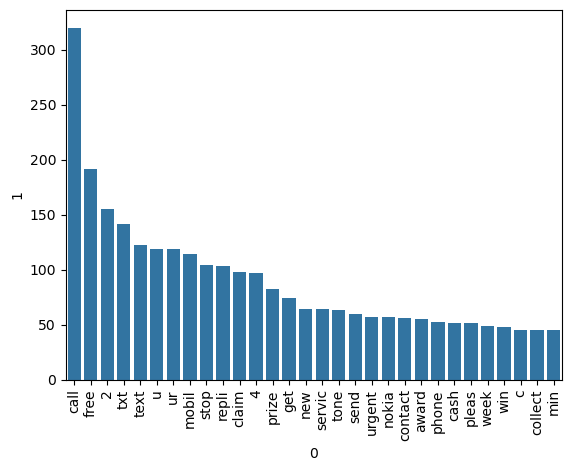

In [567]:
from collections import Counter
sf = pd.DataFrame(Counter(spam_corpus).most_common(30))
sns.barplot(x=sf[0], y=sf[1])
plt.xticks(rotation='vertical')
plt.show()

In [569]:
ham_corpus = []
for msg in df[df['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)
        

In [ ]:
from collections import Counter
sf = pd.DataFrame(Counter(spam_corpus).most_common(30))
sns.barplot(x=sf[0], y=sf[1])
plt.xticks(rotation='vertical')
plt.show()

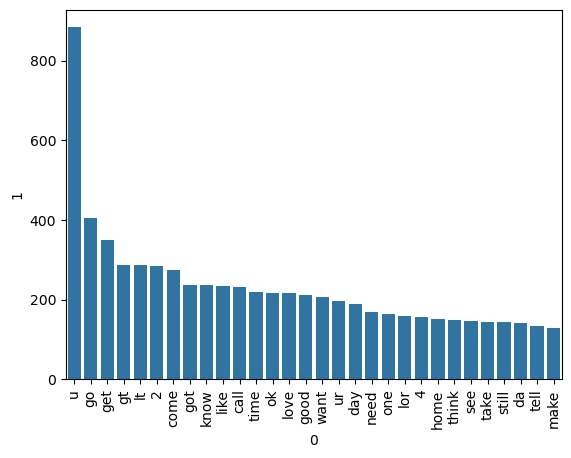

In [582]:
from collections import Counter
sf = pd.DataFrame(Counter(ham_corpus).most_common(30))
sns.barplot(x=sf[0], y=sf[1])
plt.xticks(rotation='vertical')
plt.show()

In [586]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [588]:
X = cv.fit_transform(df['transformed_text']).toarray()

In [590]:
X.shape

(5169, 6677)

In [592]:
Y= df['target'].values

In [594]:
Y

array([0, 0, 1, ..., 0, 0, 0])